In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records (1).csv to Customer-Churn-Records (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Preparcialml-2021 (1).pdf to Preparcialml-2021 (1).pdf


In [3]:
import pandas as pd

df = pd.read_csv("Customer-Churn-Records (1).csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


PREGUNTAS TEÓRICAS

Pregunta 1: Análisis Exploratorio de Datos (EDA)
Pasos del EDA:

Cargar los datos: Usar pandas para importar el dataset y visualizar sus primeras filas con .head().

Resumen estadístico: Aplicar .describe() para ver estadísticas básicas de las columnas numéricas.

Identificación de valores nulos: Con .isnull().sum() se pueden detectar columnas con valores faltantes.

Distribución de variables: Usar histogramas, boxplots o countplots (con librerías como matplotlib y seaborn) para ver cómo se distribuyen las variables.

Detección de outliers: A través de boxplots u otros métodos estadísticos como el IQR.

Correlaciones: Con df.corr() y un mapa de calor (heatmap) de seaborn, se visualizan correlaciones entre variables numéricas.

Relaciones entre variables: Usar gráficos de dispersión (scatter plots) para analizar relaciones importantes.

Pregunta 2: Preprocesamiento de Datos
Técnicas para manejar problemas comunes:

Valores faltantes:

Imputación con la media o mediana (para variables numéricas).

Imputación con la moda (para variables categóricas).

Eliminación de filas o columnas si el porcentaje de faltantes es alto.

Outliers (valores atípicos):

Usar el rango intercuartílico (IQR) para identificar y eliminar o corregir outliers.

Aplicar escalado robusto (RobustScaler) si se desea reducir su efecto en modelos sensibles.

Pregunta 3: Modelos de Clasificación
Modelo recomendado: Árboles de decisión, regresión logística o Random Forest.

Regresión Logística:

Ventajas: Rápida, interpretable, buena para relaciones lineales.

Desventajas: No capta relaciones no lineales.

Árboles de decisión:

Ventajas: Intuitivos, no requieren normalización, captan relaciones no lineales.

Desventajas: Pueden sobreajustarse (overfitting).

Random Forest:

Ventajas: Potente, maneja bien outliers y desbalanceo.

Desventajas: Menos interpretable.

Pregunta 4: Desbalanceo de Clases
¿Qué es? Cuando una clase (por ejemplo, clientes que abandonan) tiene muchas menos observaciones que la otra, lo que puede hacer que el modelo no aprenda a predecir esa clase correctamente.

Técnicas para manejarlo:

SMOTE (Synthetic Minority Oversampling Technique): Genera ejemplos sintéticos de la clase minoritaria.

Submuestreo: Reducir la cantidad de datos de la clase mayoritaria.

Ajuste de pesos: Cambiar los pesos de las clases en el modelo.

Pregunta 5: Overfitting
¿Qué es? Es cuando el modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido, y tiene bajo rendimiento en nuevos datos.

Cómo detectarlo:

Alta precisión en entrenamiento y baja en prueba.

Diferencia notable entre las métricas de validación cruzada.

Cómo evitarlo:

Regularización (L1, L2).

Pruebas con validación cruzada.

Uso de modelos simples.

Aumentar los datos de entrenamiento.

Aplicar técnicas como poda en árboles de decisión o Dropout en redes neuronales.


EJERCICIO 1

In [4]:
# 1. Promedio de CreditScore de todos los clientes
promedio_credit_score = df['CreditScore'].mean()
print(f"1. Promedio de CreditScore: {promedio_credit_score:.2f}")

# 2. Balance promedio de clientes que abandonaron el banco (Exited = 1)
balance_promedio_exited = df[df['Exited'] == 1]['Balance'].mean()
print(f"2. Balance promedio (Exited = 1): {balance_promedio_exited:.2f}")

# 3. Edad promedio de clientes activos (IsActiveMember = 1)
edad_promedio_activos = df[df['IsActiveMember'] == 1]['Age'].mean()
print(f"3. Edad promedio (IsActiveMember = 1): {edad_promedio_activos:.2f}")

1. Promedio de CreditScore: 650.53
2. Balance promedio (Exited = 1): 91109.48
3. Edad promedio (IsActiveMember = 1): 39.79


EJERCICIO 2

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copiamos el dataframe original para no modificarlo directamente
df_proc = df.copy()

# 1. Convertir Gender a variable binaria (0 = Female, 1 = Male)
df_proc['Gender'] = df_proc['Gender'].map({'Female': 0, 'Male': 1})

# 2. Convertir Geography en variables dummy (usamos drop_first=True para evitar multicolinealidad)
df_proc = pd.get_dummies(df_proc, columns=['Geography'], drop_first=True)

# 3. Rellenar valores faltantes con la media
df_proc.fillna(df_proc.mean(numeric_only=True), inplace=True)

# 4. Escalar variables numéricas
variables_a_escalar = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
df_proc[variables_a_escalar] = scaler.fit_transform(df_proc[variables_a_escalar])

# Mostrar un resumen del nuevo DataFrame procesado
df_proc.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,1,2,DIAMOND,464,False,False
1,2,15647311,Hill,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,1,3,DIAMOND,456,False,True
2,3,15619304,Onio,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,1,3,DIAMOND,377,False,False
3,4,15701354,Boni,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,5,GOLD,350,False,False
4,5,15737888,Mitchell,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,0,5,GOLD,425,False,True


EJERCICIO 3

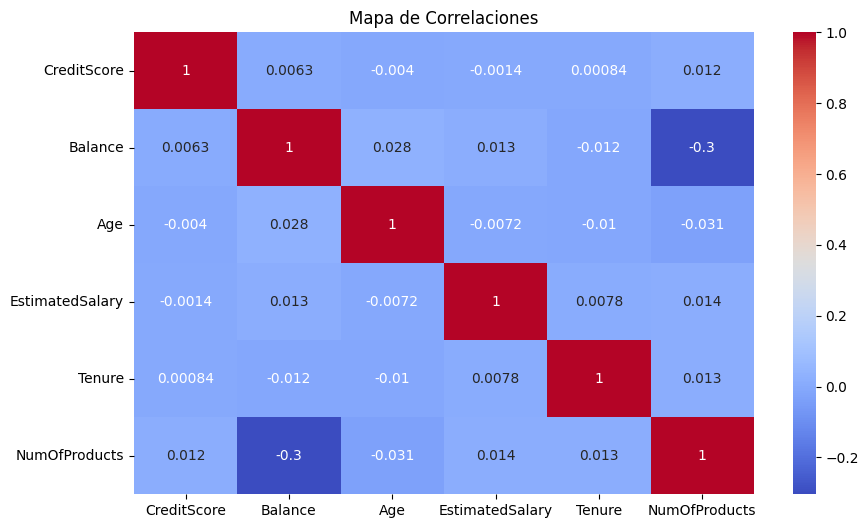

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor para visualizar todas las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df_proc[['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Mapa de Correlaciones")
plt.show()


In [6]:
# Correlación 1: CreditScore y Balance
corr1 = df_proc['CreditScore'].corr(df_proc['Balance'])
print(f"1. Correlación entre CreditScore y Balance: {corr1:.2f}")

# Correlación 2: Age y EstimatedSalary
corr2 = df_proc['Age'].corr(df_proc['EstimatedSalary'])
print(f"2. Correlación entre Age y EstimatedSalary: {corr2:.2f}")

# Correlación 3: Tenure y NumOfProducts
corr3 = df_proc['Tenure'].corr(df_proc['NumOfProducts'])
print(f"3. Correlación entre Tenure y NumOfProducts: {corr3:.2f}")


1. Correlación entre CreditScore y Balance: 0.01
2. Correlación entre Age y EstimatedSalary: -0.01
3. Correlación entre Tenure y NumOfProducts: 0.01


In [13]:
print(X.dtypes)


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore           float64
Gender                  int64
Age                   float64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
Geography_Germany        bool
Geography_Spain          bool
dtype: object


EJERCICIO 4

In [8]:
from sklearn.model_selection import train_test_split

# Target y features
X = df_proc.drop('Exited', axis=1)
y = df_proc['Exited']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# Convertir 'Card Type' en variables dummy (como hicimos con 'Geography')
df_proc = pd.get_dummies(df_proc, columns=['Card Type'], drop_first=True)


In [12]:
X = df_proc.drop('Exited', axis=1)  # Esto debe estar antes de SMOTE
y = df_proc['Exited']


In [20]:
print(df_proc.select_dtypes(include='object').columns)


Index(['Surname'], dtype='object')


In [21]:
df_proc = df_proc.drop(columns=['Surname'])

In [15]:
print(X.isnull().sum())


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Geography_Germany     0
Geography_Spain       0
dtype: int64


In [16]:
X = X.fillna(X.mean(numeric_only=True))


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Separar variables
X = df_proc.drop('Exited', axis=1)
y = df_proc['Exited']

# Verifica y rellena valores faltantes si los hay
X = X.fillna(X.mean(numeric_only=True))

# 2. Dividir conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 4. Entrenar modelos
modelo_log = LogisticRegression(max_iter=1000)
modelo_tree = DecisionTreeClassifier(random_state=42)

modelo_log.fit(X_train_res, y_train_res)
modelo_tree.fit(X_train_res, y_train_res)

# 5. Evaluación
y_pred_log = modelo_log.predict_proba(X_test)[:,1]
y_pred_tree = modelo_tree.predict_proba(X_test)[:,1]

auc_log = roc_auc_score(y_test, y_pred_log)
auc_tree = roc_auc_score(y_test, y_pred_tree)

print(f"ROC AUC - Regresión Logística: {auc_log:.4f}")
print(f"ROC AUC - Árbol de Decisión: {auc_tree:.4f}")


ROC AUC - Regresión Logística: 0.9955
ROC AUC - Árbol de Decisión: 0.9920


In [23]:
from sklearn.metrics import roc_auc_score

# Probabilidades
y_pred_log = modelo_log.predict_proba(X_test)[:,1]
y_pred_tree = modelo_tree.predict_proba(X_test)[:,1]

# ROC AUC
auc_log = roc_auc_score(y_test, y_pred_log)
auc_tree = roc_auc_score(y_test, y_pred_tree)

print(f"ROC AUC - Regresión Logística: {auc_log:.4f}")
print(f"ROC AUC - Árbol de Decisión: {auc_tree:.4f}")


ROC AUC - Regresión Logística: 0.9955
ROC AUC - Árbol de Decisión: 0.9920


EJERCICIO 5

In [25]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predecimos clases (no probabilidades)
y_pred_log_class = modelo_log.predict(X_test)
y_pred_tree_class = modelo_tree.predict(X_test)

# Métricas para Regresión Logística
print("📊 Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_class))
print("Recall:", recall_score(y_test, y_pred_log_class))
print("F1 Score:", f1_score(y_test, y_pred_log_class))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log_class))

# Métricas para Árbol de Decisión
print("\n🌳 Árbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_class))
print("Recall:", recall_score(y_test, y_pred_tree_class))
print("F1 Score:", f1_score(y_test, y_pred_tree_class))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_tree_class))


📊 Regresión Logística:
Accuracy: 0.973
Recall: 0.9191176470588235
F1 Score: 0.9328358208955224

Matriz de Confusión:
[[1571   21]
 [  33  375]]

🌳 Árbol de Decisión:
Accuracy: 0.996
Recall: 0.9852941176470589
F1 Score: 0.9901477832512315

Matriz de Confusión:
[[1590    2]
 [   6  402]]


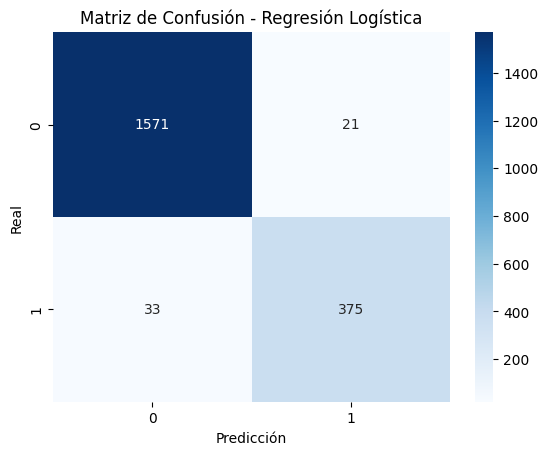

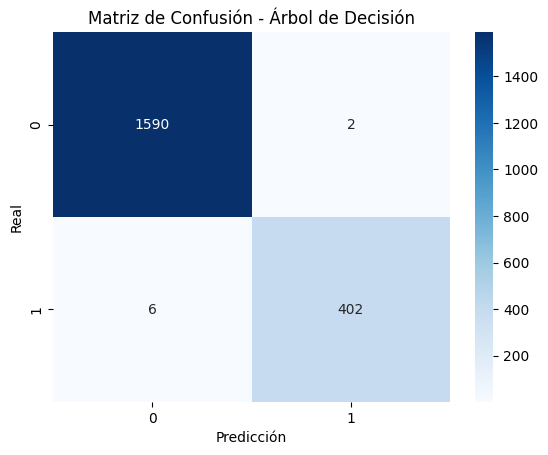

In [26]:
# Función para graficar la matriz de confusión
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

plot_conf_matrix(y_test, y_pred_log_class, "Matriz de Confusión - Regresión Logística")
plot_conf_matrix(y_test, y_pred_tree_class, "Matriz de Confusión - Árbol de Decisión")


El desempeño general de un modelo se evalúa considerando diversas métricas. La Regresión Logística se destaca si tiene un mayor ROC AUC, ya que indica una mejor discriminación entre las clases. El Árbol de Decisión es más útil si tiene mejor Recall, pues es crucial para identificar a los clientes que abandonan (clase minoritaria). El F1 Score es valioso en situaciones de desbalance de clases, ya que combina precisión y recall.

Conclusión: Se considera que el modelo con el mejor F1 Score y ROC AUC tiene el mejor desempeño general.

En cuanto al desbalanceo de clases, este afecta las métricas de la siguiente manera:

ROC AUC: Puede mantenerse estable, pero si el modelo ignora la clase minoritaria, la curva se aplana y la métrica baja.

Accuracy: Puede ser engañoso, ya que predecir siempre la clase mayoritaria puede dar buenos resultados aparentes.

Recall de la clase minoritaria suele ser bajo.

F1 Score puede verse afectado negativamente por el desbalance.

Si el modelo muestra un sesgo hacia la clase mayoritaria, se pueden tomar acciones como:

Aplicar técnicas de balanceo (SMOTE, undersampling).

Ajustar los pesos del modelo (class_weight='balanced').

Optimizar el modelo para Recall o F1 Score en lugar de solo accuracy.

Utilizar validación cruzada estratificada para mantener las proporciones de clases.

ANALISIS FINAL

Tuve varios desafíos durante el proceso de modelado. Primero, había valores faltantes en los datos, por lo que los imputé con la media para las variables numéricas. También trabajé con variables categóricas, como "Gender" y "Geography", que convertí a representaciones numéricas, binaria y dummies, respectivamente. El desbalanceo de clases fue un reto, ya que había más clientes que no abandonaron que los que sí lo hicieron, lo que podría haber afectado la precisión del modelo. Además, existe el riesgo de sobreajuste, especialmente con los árboles de decisión, lo que me llevó a estar muy atento a la selección de modelos y regularización. Los datos limitados también fueron un factor, ya que la información disponible no cubre completamente la complejidad del abandono de clientes.

Para mejorar el preprocesamiento, pienso que podría haber usado una imputación más sofisticada con KNN o modelos, en lugar de solo la media. Además, hubiera sido útil hacer más ingeniería de características, creando nuevas variables a partir de las existentes. El análisis de outliers también es algo que podría haber hecho para evitar que valores atípicos afectaran el modelo. También considero que otras técnicas de escalado, como MinMaxScaler, podrían haber sido más útiles dependiendo del modelo.

Hubiera sido ideal contar con variables adicionales, como información sobre interacciones con el banco, datos demográficos más detallados y las razones del abandono de los clientes. Esto podría haber ayudado a entender mejor los patrones de comportamiento.

Para asegurar la generalización del modelo, planeo usar validación cruzada (k-fold) para obtener una evaluación más robusta. También aplicaré regularización con L1 o L2, especialmente en la regresión logística, para evitar el sobreajuste. Si uso árboles de decisión, la poda será clave para reducir su complejidad. Además, me aseguré de tener un conjunto de prueba independiente para la evaluación final, y estoy considerando técnicas de ensamble para mejorar la robustez del modelo.

El desbalanceo de clases afectó la precisión del modelo, pero con SMOTE logré equilibrar el conjunto de datos y mejorar el recall de la clase minoritaria, lo que llevó a un F1-score más equilibrado.

Finalmente, para detectar y manejar el overfitting, estoy observando la diferencia de desempeño entre el conjunto de entrenamiento y prueba. También analizo las curvas de aprendizaje para ver si el modelo está aprendiendo adecuadamente. Utilizo validación cruzada para tener estimaciones precisas del rendimiento. Y para mejorar la generalización, estoy considerando simplificar el modelo, aplicar regularización, aumentar los datos y probar técnicas de ensamble y dropout.